In [112]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_key import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(api_key)


1a7c543ce765a519954e7608058560b0


In [113]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

In [114]:
print(cities[0])

rawson


In [116]:
base_url = "http://api.openweathermap.org/data/2.5/weather?appid="


weather_df = pd.DataFrame()
weather_df["City"] = ""
weather_df["Country"] = ""
weather_df["Temp"] = ""
weather_df["Humidity"] = "" 
weather_df["Cloud Coverage"] = ""
weather_df["Wind Speed"] = ""
weather_df["Lat"] = ""
weather_df["Lng"] = ""
weather_df["Date"] = ""


for x in np.arange(len(cities)):

    print(f"Processing City Info {x} | {cities[x]}")
    
    try:
        
        current_weather = requests.get(f"{base_url}{api_key}&q={cities[x]}&units=imperial").json()
        
        weather_df.loc[x, "City"] = current_weather["name"]           
        weather_df.loc[x, "Country"] = current_weather["sys"]["country"]
        weather_df.loc[x, "Temp"] = current_weather["main"]["temp"]
        weather_df.loc[x, "Humidity"] = current_weather["main"]["humidity"]
        weather_df.loc[x, "Cloud Coverage"] = current_weather["clouds"]["all"]
        weather_df.loc[x, "Wind Speed"] = current_weather["wind"]["speed"]
        weather_df.loc[x, "Lat"] = current_weather["coord"]["lat"]
        weather_df.loc[x, "Lng"] = current_weather["coord"]["lon"]
        weather_df.loc[x, "Date"] = current_weather["dt"]
        
    
    except (KeyError, IndexError):
        print("City not found. Skipping...")

complete_weather = weather_df.dropna()

Processing City Info 0 | rawson
Processing City Info 1 | katsuura
Processing City Info 2 | horta
Processing City Info 3 | ushuaia
Processing City Info 4 | novo aripuana
Processing City Info 5 | lompoc
Processing City Info 6 | illoqqortoormiut
City not found. Skipping...
Processing City Info 7 | kidal
Processing City Info 8 | vaini
Processing City Info 9 | dikson
Processing City Info 10 | loreto
Processing City Info 11 | rikitea
Processing City Info 12 | jiuquan
Processing City Info 13 | fairbanks
Processing City Info 14 | ondorhaan
City not found. Skipping...
Processing City Info 15 | bubaque
Processing City Info 16 | georgetown
Processing City Info 17 | tiksi
Processing City Info 18 | butaritari
Processing City Info 19 | saint-philippe
Processing City Info 20 | bintulu
Processing City Info 21 | grand river south east
City not found. Skipping...
Processing City Info 22 | baker city
Processing City Info 23 | hilo
Processing City Info 24 | nizhneyansk
City not found. Skipping...
Processi

Processing City Info 208 | arlit
Processing City Info 209 | wulanhaote
City not found. Skipping...
Processing City Info 210 | gumdag
Processing City Info 211 | natal
Processing City Info 212 | linxia
Processing City Info 213 | haines junction
Processing City Info 214 | flinders
Processing City Info 215 | agva
City not found. Skipping...
Processing City Info 216 | saleaula
City not found. Skipping...
Processing City Info 217 | isangel
Processing City Info 218 | kaitangata
Processing City Info 219 | rodrigues alves
Processing City Info 220 | santiago del estero
Processing City Info 221 | kaseda
Processing City Info 222 | ust-kulom
Processing City Info 223 | mishan
Processing City Info 224 | puerto ayora
Processing City Info 225 | manadhoo
Processing City Info 226 | de-kastri
Processing City Info 227 | dhidhdhoo
Processing City Info 228 | basoko
Processing City Info 229 | hobyo
Processing City Info 230 | mamit
Processing City Info 231 | linqiong
Processing City Info 232 | coos bay
Process

Processing City Info 425 | ilebo
Processing City Info 426 | novouzensk
Processing City Info 427 | huntsville
Processing City Info 428 | kabare
Processing City Info 429 | yefimovskiy
City not found. Skipping...
Processing City Info 430 | bandarbeyla
Processing City Info 431 | shwebo
Processing City Info 432 | tuatapere
Processing City Info 433 | la rioja
Processing City Info 434 | itoman
Processing City Info 435 | san cristobal
Processing City Info 436 | vaitape
Processing City Info 437 | bonavista
Processing City Info 438 | kumluca
Processing City Info 439 | sandovo
Processing City Info 440 | westport
Processing City Info 441 | fort nelson
Processing City Info 442 | bogovarovo
Processing City Info 443 | morros
Processing City Info 444 | necochea
Processing City Info 445 | barawe
City not found. Skipping...
Processing City Info 446 | matiri
Processing City Info 447 | muroto
Processing City Info 448 | tromso
Processing City Info 449 | geraldton
Processing City Info 450 | brae
Processing 

In [137]:
# complete_weather.to_csv(output_data_file)

In [118]:
complete_weather.count()

City              539
Country           539
Temp              539
Humidity          539
Cloud Coverage    539
Wind Speed        539
Lat               539
Lng               539
Date              539
dtype: int64

In [119]:
complete_weather.head()

,City,Country,Temp,Humidity,Cloud Coverage,Wind Speed,Lat,Lng,Date
0,Rawson,AR,45.22,57,33,9.57,-43.3,-65.11,1563143693
1,Katsuura,JP,72.21,83,75,6.93,33.93,134.5,1563143584
2,Horta,BR,75.2,83,40,8.05,-10.93,-37.66,1563143693
3,Ushuaia,AR,37.4,86,20,3.36,-54.81,-68.31,1563143454
4,Novo Aripuana,BR,79.42,74,88,2.08,-5.12,-60.38,1563143694


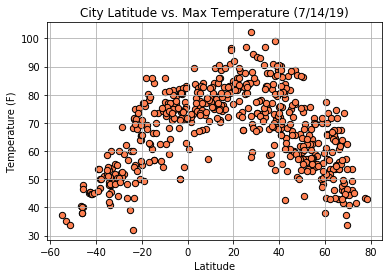

In [120]:
# Temperature (F) vs. Latitude

plt.scatter(complete_weather["Lat"], complete_weather["Temp"], color="coral",
           edgecolors = "black", s = 40)

plt.title(f"City Latitude vs. Temperature (7/14/19)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()

# plt.savefig("output_data/latVtemp.png")

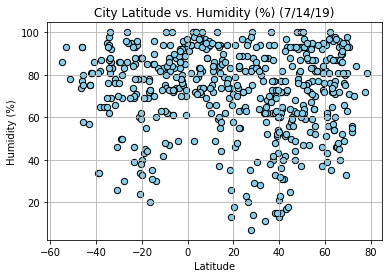

In [122]:
# Humidity (%) vs. Latitude

plt.scatter(complete_weather["Lat"], complete_weather["Humidity"], color="skyblue",
           edgecolors = "black", s = 40)

plt.title(f"City Latitude vs. Humidity (%) (7/14/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
# plt.savefig("output_data/latVhumid.png")

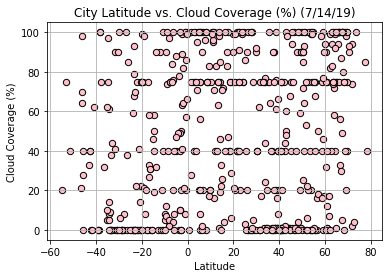

In [126]:
# Cloudiness (%) vs. Latitude

plt.scatter(complete_weather["Lat"], complete_weather["Cloud Coverage"], color="pink",
           edgecolors = "black", s = 40)

plt.title(f"City Latitude vs. Cloud Coverage (%) (7/14/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage (%)")
plt.grid()

# plt.savefig("output_data/latVcloud.png")

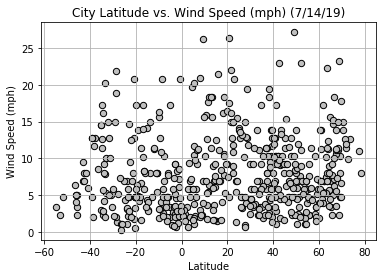

In [135]:
# Wind Speed (mph) vs. Latitude

plt.scatter(complete_weather["Lat"], complete_weather["Wind Speed"], color="silver",
           edgecolors = "black", s = 40)

plt.title(f"City Latitude vs. Wind Speed (mph) (7/14/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# plt.savefig("output_data/latVwind.png")